In [362]:
import numpy as np
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import time

In [408]:
def create_pol(policy,r,c):
    count = 0;
    pol_v_all = []
    pol_v = []
    for i in range(r):
        for j in range(c):
            if policy[count] == 0.:
#                 pol_v[i,j] = 'L'
                pol_v.append('L')
            elif policy[count] == 1.:
#                 pol_v[i,j] = 'D'
                pol_v.append('D')
            elif policy[count] == 2.:
#                 pol_v[i,j] = 'R'
                pol_v.append('R')
            elif policy[count] == 3.:
#                 pol_v[i,j] = 'U'
                pol_v.append('U')
            count += 1
        if i == 0:
            pol_v_all = np.array(pol_v.copy())
        else:
            pol_v_all = np.vstack((pol_v_all,pol_v))
        pol_v = []
    return pol_v_all

In [374]:
def run_episode(env, policy, gamma = 1.0, max_steps = 1000, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    step_num = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
#         total_reward += (gamma ** step_idx * reward)     
        total_reward += (reward)
        step_idx += 1
        step_num += 1
        if done or step_num == max_steps:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, max_steps = 1000, render = False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    max_iterations = 20000
    scores_all = []
    for i in range(max_iterations):
#         start = time.clock()
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
#         print(time.clock() - start)
        scores_all.append(evaluate_policy(env, new_policy, gamma))
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return [policy, scores_all]


# 16x16 Results

In [375]:
env_name  = 'FrozenLake16x16-v0'
env = gym.make(env_name)
env = env.unwrapped
sg = []
end_score = []
g = np.arange(0.1,1.11,0.1)


for i in range(len(g)-1):
    print(g[i])
#     start = time.clock()
    [optimal_policy,scores_all] = policy_iteration(env, gamma = g[i])
#     print(time.clock() - start)
    end_score.append(evaluate_policy(env, optimal_policy, g[i]))
    sg.append(scores_all)
    print(scores)
    print('Average scores = ', np.mean(scores))

0.1
Policy-Iteration converged at step 9.
0.9499999999999567
Average scores =  0.9499999999999567
0.2
Policy-Iteration converged at step 15.
0.9499999999999567
Average scores =  0.9499999999999567
0.30000000000000004
Policy-Iteration converged at step 10.
0.9499999999999567
Average scores =  0.9499999999999567
0.4
Policy-Iteration converged at step 8.
0.9499999999999567
Average scores =  0.9499999999999567
0.5
Policy-Iteration converged at step 8.
0.9499999999999567
Average scores =  0.9499999999999567
0.6
Policy-Iteration converged at step 7.
0.9499999999999567
Average scores =  0.9499999999999567
0.7000000000000001
Policy-Iteration converged at step 6.
0.9499999999999567
Average scores =  0.9499999999999567
0.8
Policy-Iteration converged at step 8.
0.9499999999999567
Average scores =  0.9499999999999567
0.9
Policy-Iteration converged at step 13.
0.9499999999999567
Average scores =  0.9499999999999567
1.0
Policy-Iteration converged at step 18.
0.9499999999999567
Average scores =  0.94

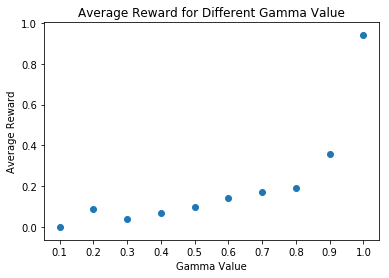

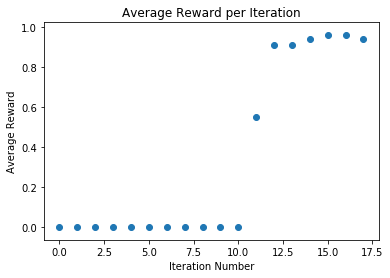

[3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 3. 0. 3. 0. 0. 2. 3. 2. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2.
 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 1. 3. 1. 1. 1. 2.
 0. 1. 1. 3. 1. 1. 1. 2. 0. 0. 0. 0. 2. 3. 2. 2. 0. 0. 0. 0. 2. 3. 2. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2.
 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2.
 0. 0. 2. 0. 0. 0. 0. 2. 0. 1. 1. 3. 1. 1. 1. 3. 0. 1. 1. 3. 1. 1. 1. 2.
 0. 0. 0. 0. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 0.]
[0.0, 0.09, 0.04, 0.07, 0.1, 0.14, 0.17, 0.19, 0.36, 0.94]


In [406]:
x_t = np.round(g[0:-1],4)
plt.scatter(np.arange(0,len(end_score),1),end_score[0:])
plt.xticks(np.arange(0,len(end_score),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg[-1]),1),sg[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()

In [358]:
env_name  = 'FrozenLake16x16-v0'
env = gym.make(env_name)
env = env.unwrapped
sg = []
end_score = []
g = np.arange(0.9,1.025,0.02)


for i in range(len(g)-1):
    print(g[i])
    [optimal_policy,scores_all] = policy_iteration(env, gamma = g[i])
    end_score.append(evaluate_policy(env, optimal_policy, g[i]))
    sg.append(scores_all)
    print(scores)
    print('Average scores = ', np.mean(scores))

0.9
Policy-Iteration converged at step 7.
0.9499999999999567
Average scores =  0.9499999999999567
0.92
Policy-Iteration converged at step 6.
0.9499999999999567
Average scores =  0.9499999999999567
0.9400000000000001
Policy-Iteration converged at step 7.
0.9499999999999567
Average scores =  0.9499999999999567
0.9600000000000001
Policy-Iteration converged at step 7.
0.9499999999999567
Average scores =  0.9499999999999567
0.9800000000000001
Policy-Iteration converged at step 9.
0.9499999999999567
Average scores =  0.9499999999999567
1.0
Policy-Iteration converged at step 18.
0.9499999999999567
Average scores =  0.9499999999999567


# 16x16 Plots

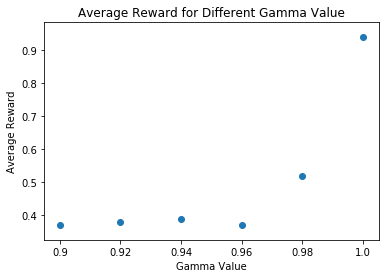

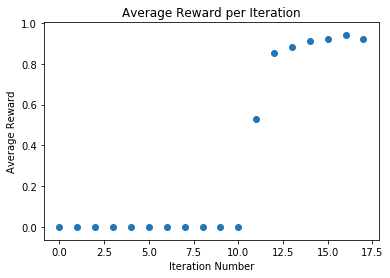

[0.37, 0.38, 0.39, 0.37, 0.52, 0.94]

In [359]:
x_t = np.round(g[0:-1],4)
plt.scatter(np.arange(0,len(end_score),1),end_score[0:])
plt.xticks(np.arange(0,len(end_score),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg[-1]),1),sg[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()

optimal_policy
end_score

# 4x4 Results

In [370]:
env_name  = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped
sg_4 = []
end_score_4 = []
g_4 = np.arange(0.8,1.025,0.02)

for i in range(len(g_4)-1):
    print(g_4[i])
    start = time.clock()
    [optimal_policy,scores_all] = policy_iteration(env, gamma = g_4[i])
    print(time.clock() - start)
    st
    end_score_4.append(evaluate_policy(env, optimal_policy, g_4[i]))
    sg_4.append(scores_all)
    print(scores)
    print('Average scores = ', np.mean(scores))

0.8
0.0019669943738733764
0.003747566437709793
0.0038045857156987495
0.003766686674623543
Policy-Iteration converged at step 4.
0.11357489021230549


NameError: name 'st' is not defined

[0.49, 0.8, 0.87, 0.73, 0.85, 0.87, 0.73, 0.78, 0.79, 0.8, 0.78]


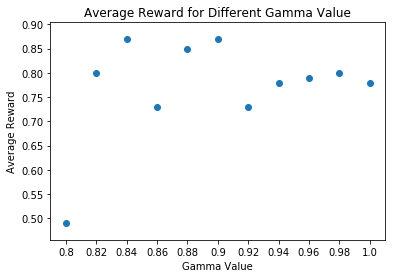

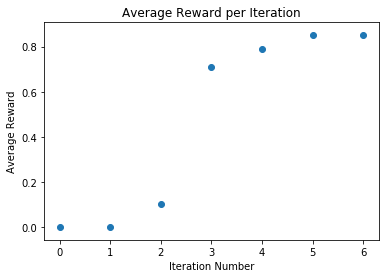

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [343]:
print(end_score_4)
x_t = np.round(g_4[0:-1],4)
plt.scatter(np.arange(0,len(end_score_4),1),end_score_4[0:])
plt.xticks(np.arange(0,len(end_score_4),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg_4[-1]),1),sg_4[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()

optimal_policy

In [360]:
env_name  = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped
sg_4 = []
end_score_4 = []
g_4 = np.arange(0.1,1.11,0.1)

for i in range(len(g_4)-1):
    print(g_4[i])
    [optimal_policy,scores_all] = policy_iteration(env, gamma = g_4[i])
    end_score_4.append(evaluate_policy(env, optimal_policy, g_4[i]))
    sg_4.append(scores_all)
    print(scores)
    print('Average scores = ', np.mean(scores))

0.1
Policy-Iteration converged at step 3.
0.9499999999999567
Average scores =  0.9499999999999567
0.2
Policy-Iteration converged at step 4.
0.9499999999999567
Average scores =  0.9499999999999567
0.30000000000000004
Policy-Iteration converged at step 5.
0.9499999999999567
Average scores =  0.9499999999999567
0.4
Policy-Iteration converged at step 6.
0.9499999999999567
Average scores =  0.9499999999999567
0.5
Policy-Iteration converged at step 3.
0.9499999999999567
Average scores =  0.9499999999999567
0.6
Policy-Iteration converged at step 3.
0.9499999999999567
Average scores =  0.9499999999999567
0.7000000000000001
Policy-Iteration converged at step 3.
0.9499999999999567
Average scores =  0.9499999999999567
0.8
Policy-Iteration converged at step 5.
0.9499999999999567
Average scores =  0.9499999999999567
0.9
Policy-Iteration converged at step 5.
0.9499999999999567
Average scores =  0.9499999999999567
1.0
Policy-Iteration converged at step 4.
0.9499999999999567
Average scores =  0.949999

[0.45, 0.42, 0.53, 0.55, 0.54, 0.38, 0.42, 0.42, 0.77, 0.85]


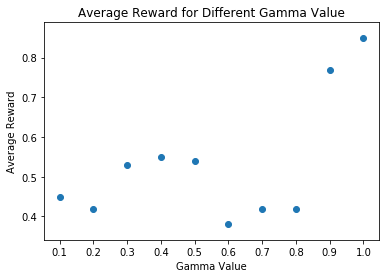

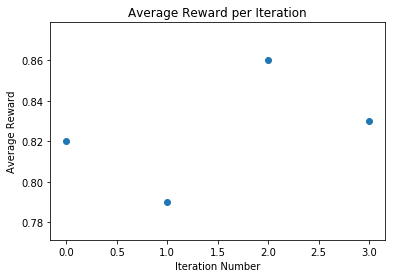

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [361]:
print(end_score_4)
x_t = np.round(g_4[0:-1],4)
plt.scatter(np.arange(0,len(end_score_4),1),end_score_4[0:])
plt.xticks(np.arange(0,len(end_score_4),1),x_t) 
plt.xlabel('Gamma Value')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Gamma Value')
plt.show()

plt.scatter(np.arange(0,len(sg_4[-1]),1),sg_4[-1])
plt.title('Average Reward per Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward')
plt.show()

optimal_policy